<a href="https://colab.research.google.com/github/kostkalab/mol-evol_notebooks/blob/main/lecture_mol_evol_03_29_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neutral evolutionary rates

In the lecture we discussed how we can use four-fold degenerate sites to "gauge" our evelutionary models (in terms of substitution rates).

Here we now download an alignment and fit a neutral model.
We will do that in parctice next.


### Download alignment data.

> Indented block



In [4]:
devtools::install_github("CshlSiepelLab/RPHAST")

Skipping install of 'rphast' from a github remote, the SHA1 (2b68f4cb) has not changed since last install.
  Use `force = TRUE` to force installation



We download a coding sequence alignment from UCSC:

In [5]:
library(rphast)

#- download alignment and unzip
url        <- 'https://hgdownload.soe.ucsc.edu/goldenPath/hg38/multiz7way/alignments/knownCanonical.exonNuc.fa.gz'
tfle_name1 <- paste0(tempfile(),'.fa.gz')
tfle_name2 <- tfle_name1 |> stringr::str_remove('\\.gz')
tfle_name3 <- paste0(tempfile(),'.fa')
download.file(url, tfle_name1)
cmd        <- paste('gunzip', tfle_name1)
system(cmd)

#- only look at the first ~ 100k lines
cmd <- paste( 'head -n 99995 ', tfle_name2 , ' > ', tfle_name3)
system(cmd)

#- read in alignment
msa <- read.msa(tfle_name3, format = 'FASTA')
# msa
file.remove(tfle_name2) #- cleanup
file.remove(tfle_name3) #- cleanup

[1] TRUE

[1] TRUE

### Questions:

- What species are in this alignment?
- What was version of the assembly of the human genome was used?

### Download a neutral model

To get at an estimate for neutral substituion rates we would like to extract four-fold degenerate sites from this alignment. 

To do that, we can use functionality provided by `rphast`.

However, we need annotation about the coding sequences in the alignment.
We will use **human** GENCODE annoation for that. Do you have a guess what that is okay to do?

In [6]:
#- download gff3 file from GENCODE (current annotation)
url        <- 'https://hgdownload.soe.ucsc.edu/goldenPath/hg38/phastCons7way/hg38.phastCons7way.mod' 
tfle_name1 <- paste0(tempfile(),'.mod')
download.file(url, tfle_name1)
mod_n <- read.tm(tfle_name1)


### Question
- How many substitutions do you expect on the Chimpanzee lineage?
- How many on human and chimpanzee lineages combined?
- Plot the species tree

### Assignment
* Simulate an alignment of length 55 with the current model (we have done that using `simulate.msa`)
* "Stretch" the species tree, so that each branch is 5x as long as in the neutral model (see `rphast::rescale.tree`)
* Simulate a second alignment, using the "stretched" tree
* Compare
* Next, "shrink" the orignal tree, so that all branchlengths are 1/5 of the neural length
* Simulate a third alignment
* Compare

In [ ]:
?rphast::rescale.tree

In [7]:
install.packages('ade4')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘Rcpp’, ‘RcppArmadillo’




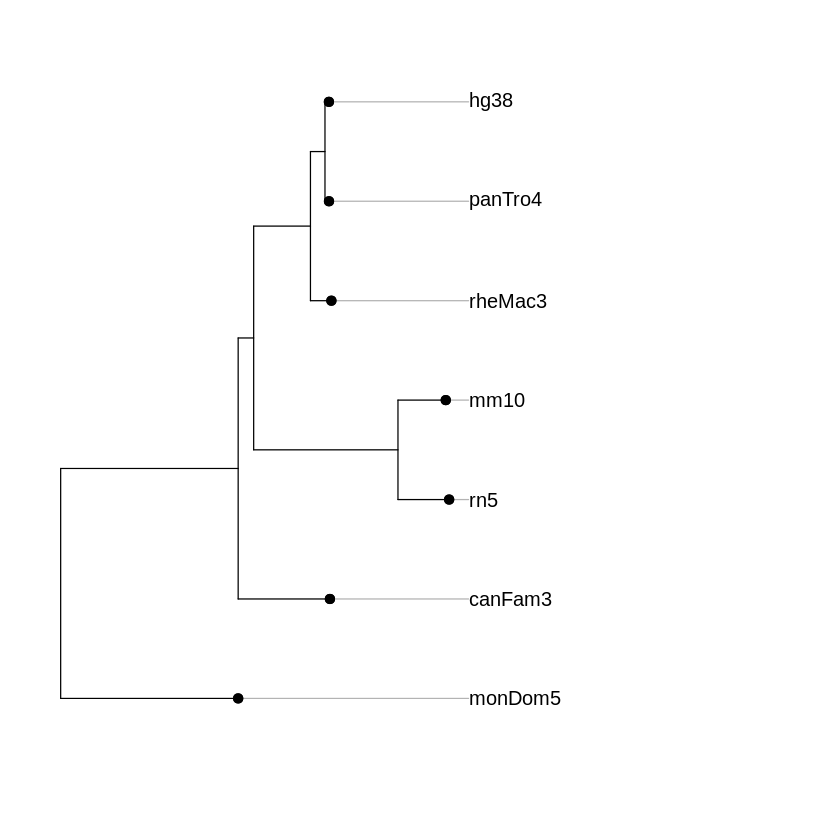

In [8]:
plot(ade4::newick2phylog(mod_n$tree))

In [9]:
mod_n

ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -16383708.873581
BACKGROUND: 0.211867 0.322407 0.234085 0.231641 
RATE_MAT:
  -1.104985    0.272548    0.597439    0.234998 
   0.179103   -0.867492    0.187269    0.501120 
   0.540735    0.257927   -0.986406    0.187744 
   0.214939    0.697481    0.189725   -1.102144 
TREE: (((((hg38:0.00673596,panTro4:0.00686169):0.0248146,rheMac3:0.0357598):0.0970072,(mm10:0.081661,rn5:0.0874126):0.246527):0.0264964,canFam3:0.156769):0.303241,monDom5:0.303241);

In [10]:
str(mod_n)

List of 8
 $ alphabet   : chr "ACGT"
 $ backgd     : num [1:4] 0.212 0.322 0.234 0.232
 $ rate.matrix: num [1:4, 1:4] -1.105 0.179 0.541 0.215 0.273 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "0" "1" "2" "3"
  .. ..$ : NULL
 $ subst.mod  : chr "REV"
 $ likelihood : num -16383709
 $ alpha      : num 0
 $ nratecats  : int 1
 $ tree       : chr "(((((hg38:0.00673596,panTro4:0.00686169):0.0248146,rheMac3:0.0357598):0.0970072,(mm10:0.081661,rn5:0.0874126):0"| __truncated__
 - attr(*, "class")= chr "tm"


In [11]:
mod_n$tree

[1] "(((((hg38:0.00673596,panTro4:0.00686169):0.0248146,rheMac3:0.0357598):0.0970072,(mm10:0.081661,rn5:0.0874126):0.246527):0.0264964,canFam3:0.156769):0.303241,monDom5:0.303241);"

In [13]:
summary.tree(mod_n$tree)

name,tparent,troot,parent,lchild,rchild
<chr>,<dbl>,<dbl>,<int>,<int>,<int>
NA,NA,0.0000000,NA,2,13
NA,0.30324100,0.3032410,1,3,12
NA,0.02649640,0.3297374,2,4,9
NA,0.09700720,0.4267446,3,5,8
NA,0.02481460,0.4515592,4,6,7
hg38,0.00673596,0.4582952,5,NA,NA
panTro4,0.00686169,0.4584209,5,NA,NA
rheMac3,0.03575980,0.4625044,4,NA,NA
NA,0.24652700,0.5762644,3,10,11


In [14]:
msa <- simulate.msa(mod_n, nsim = 55)
msa

msa object with 7 sequences and 55 columns, stored in R
$names
[1] "hg38"    "panTro4" "rheMac3" "mm10"    "rn5"     "canFam3" "monDom5"

$alphabet
[1] "ACGT"

$is.ordered
[1] TRUE

$seq
[1] "TACAAATCTCGCACGTCGCTCGCTTATCTGATCAAGCCTGCCTTGCCTCCCAATG"
[2] "TACAAATCTCGCACGTCGCTCGCTTATCTGATCAAGCCTGTCTTGCCTCCCAATG"
[3] "TACAAATCTCGCATGTCGCTCGCTTATCTGATCAAGCCTGCCTTGCCTCCCAATG"
[4] "AATAAAATCCGCACGTGGCTCGCTCCCCTGATCTAGTCTCCCCTGTGTCCCATTG"
[5] "CATTAAATCCGCACGTTGTTCGCCCCCCTGACCTAGTCTCCCCCGTGTCCCAGTG"
[6] "GACGGGTTACGGACATCGCTCGCTCACCTGCTGTCGTCCCACTTGCGTCGCGGCG"
[7] "TATACCTACCAGTCGTCACACGCTTACTTGCTCAGGGCTGCCTAGAACTCCAACG"


In [15]:
mod_slow <- mod_n
mod_slow$tree <- rescale.tree(mod_n$tree,  scale = 1/5.0)

In [16]:
mod_n$tree

[1] "(((((hg38:0.00673596,panTro4:0.00686169):0.0248146,rheMac3:0.0357598):0.0970072,(mm10:0.081661,rn5:0.0874126):0.246527):0.0264964,canFam3:0.156769):0.303241,monDom5:0.303241);"

In [17]:
mod_slow$tree

[1] "(((((hg38:0.00134719,panTro4:0.00137234):0.00496292,rheMac3:0.00715196):0.0194014,(mm10:0.0163322,rn5:0.0174825):0.0493054):0.00529928,canFam3:0.0313538):0.0606482,monDom5:0.0606482);"

In [18]:
msa_slow <- simulate.msa(mod_slow, nsim = 55)

In [19]:
msa$seq

[1] "TACAAATCTCGCACGTCGCTCGCTTATCTGATCAAGCCTGCCTTGCCTCCCAATG"
[2] "TACAAATCTCGCACGTCGCTCGCTTATCTGATCAAGCCTGTCTTGCCTCCCAATG"
[3] "TACAAATCTCGCATGTCGCTCGCTTATCTGATCAAGCCTGCCTTGCCTCCCAATG"
[4] "AATAAAATCCGCACGTGGCTCGCTCCCCTGATCTAGTCTCCCCTGTGTCCCATTG"
[5] "CATTAAATCCGCACGTTGTTCGCCCCCCTGACCTAGTCTCCCCCGTGTCCCAGTG"
[6] "GACGGGTTACGGACATCGCTCGCTCACCTGCTGTCGTCCCACTTGCGTCGCGGCG"
[7] "TATACCTACCAGTCGTCACACGCTTACTTGCTCAGGGCTGCCTAGAACTCCAACG"

In [20]:
msa_slow$seq

[1] "GAATCACCTCAACCTTCGATAAGTTCCCGCTCACATAGAGCGGCCACCTAGCCAG"
[2] "GAACCACCTCAACCTTCGATAAGTTCCCGCTCACATAGAGCGGCCACCTAGCCAG"
[3] "GAATCACCTCAACCTTCGATAAGTTCCCGCTCACATAGAGCGGCCACCTAGCCAG"
[4] "GAATCACCTCAACCTTCGATAAGTTGCCGCTCACATAGAGCGGCTACTTAGCCAG"
[5] "GAATCACCTCAACCTTCGATAAGTTGCCGCTCACATAGAGCGGCCACTTAGCCAG"
[6] "GAATCACCTCAACCTTCGTTAAGTTCCCGCTCACATAGAGCGGCCACTTAACCGG"
[7] "GCATCAGCTCAGCCTTCGTTGACCTCCCGCTCACATAGAGCGGCCACGTAACCAG"

In [21]:
mod_fast <- mod_n
mod_fast$tree = rescale.tree(mod_n$tree, scale = 5.0)
msa_fast = simulate.msa(mod_fast, nsim = 55)
mod_fast

ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -16383708.873581
BACKGROUND: 0.211867 0.322407 0.234085 0.231641 
RATE_MAT:
  -1.104985    0.272548    0.597439    0.234998 
   0.179103   -0.867492    0.187269    0.501120 
   0.540735    0.257927   -0.986406    0.187744 
   0.214939    0.697481    0.189725   -1.102144 
TREE: (((((hg38:0.0336798,panTro4:0.0343085):0.124073,rheMac3:0.178799):0.485036,(mm10:0.408305,rn5:0.437063):1.23263):0.132482,canFam3:0.783845):1.5162,monDom5:1.5162);

In [22]:
msa_fast

msa object with 7 sequences and 55 columns, stored in R
$names
[1] "hg38"    "panTro4" "rheMac3" "mm10"    "rn5"     "canFam3" "monDom5"

$alphabet
[1] "ACGT"

$is.ordered
[1] TRUE

$seq
[1] "AATCCCAAGATGTGTTAATTGCCTTCTGACAACACTCCCGGTGCGTTGCCCCATA"
[2] "AATCCCAAGACGTGTTTATTGCCCTCTGACAACACTCTCGGTGCGTTGCCCCATA"
[3] "AATCTCCAGACATGATACTTGACCTTCAGCAAAAATCCGGATGCGTTGCCTCGTA"
[4] "TAACGCCACTCACCGCATAAACGGAGTGTCTGAGACTTAGACTTATTAGTCCACG"
[5] "TACCGCGAGTCAACGTCGCGATAGTTCCGCTTTGCATCGGGTTTATGGTATCGAT"
[6] "ATAAGCTACCCGGGATCACCTACTCTGAGAGACTCCCACTACGTGCGGCAGTTTG"
[7] "ACGCTCTTAACGTCGGCATCTCTTGTCGCCCCTTCACCATATTCACGCTATCTTC"


In [23]:
msa_slow$seq

[1] "GAATCACCTCAACCTTCGATAAGTTCCCGCTCACATAGAGCGGCCACCTAGCCAG"
[2] "GAACCACCTCAACCTTCGATAAGTTCCCGCTCACATAGAGCGGCCACCTAGCCAG"
[3] "GAATCACCTCAACCTTCGATAAGTTCCCGCTCACATAGAGCGGCCACCTAGCCAG"
[4] "GAATCACCTCAACCTTCGATAAGTTGCCGCTCACATAGAGCGGCTACTTAGCCAG"
[5] "GAATCACCTCAACCTTCGATAAGTTGCCGCTCACATAGAGCGGCCACTTAGCCAG"
[6] "GAATCACCTCAACCTTCGTTAAGTTCCCGCTCACATAGAGCGGCCACTTAACCGG"
[7] "GCATCAGCTCAGCCTTCGTTGACCTCCCGCTCACATAGAGCGGCCACGTAACCAG"